# **Customer Personality Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
customer = pd.read_csv('/content/customer_personality.csv')

In [3]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
missing_val = customer.isna().sum().to_dict()

In [9]:
missing_val_df = pd.DataFrame(list(missing_val.items()),columns=['Column','Missing_Values'])
missing_val_df

,Column,Missing_Values
0,ID,0
1,Year_Birth,0
2,Education,0
3,Marital_Status,0
4,Income,24
5,Kidhome,0
6,Teenhome,0
7,Dt_Customer,0
8,Recency,0
9,MntWines,0


In [10]:
fig = px.bar(missing_val_df,x='Column',y='Missing_Values',template='plotly_white',title="Missing Values")
fig

In [11]:
customer = customer.dropna()

In [12]:
customer.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# **Feature Engineering**

In [13]:
import datetime as dt

In [14]:
customer['Age'] = 2024 - customer.Year_Birth

<ipython-input-14-c31af71a49af>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'],format='%d-%m-%Y')
customer['Month_Customer'] = 12.0 * (2024 - customer.Dt_Customer.dt.year ) + (1 - customer.Dt_Customer.dt.month)

<ipython-input-15-2f51f0fd62a9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-2f51f0fd62a9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
customer['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [17]:
customer['Total_Spending'] = customer.MntWines + customer.MntFruits + customer.MntFishProducts + customer.MntMeatProducts + customer.MntSweetProducts + customer.MntGoldProds


<ipython-input-17-5182d36f5bc4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
customer.loc[(customer['Age']>=13) & (customer['Age']<=19),'AgeGroup']='Teen'
customer.loc[(customer['Age']>=20) & (customer['Age']<=39),'AgeGroup']='Adult'
customer.loc[(customer['Age']>=40) & (customer['Age']<=59),'AgeGroup']='MiddleAged'
customer.loc[(customer['Age']>=60),'AgeGroup']='SeniorCitizen'

<ipython-input-18-ad5b9a1ae744>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
customer['children'] = customer['Kidhome']+customer['Teenhome']

<ipython-input-19-fab198882d4d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Month_Customer', 'Total_Spending', 'AgeGroup', 'children'],
      dtype='object')

In [21]:
customer['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [22]:
customer.Marital_Status = customer.Marital_Status.replace({
    'Together': 'Partner',
    'Married' : 'Partner',
    'Single' : 'Single',
    'Divorced' : 'Single',
    'Widow' : 'Single',
    'Alone' : 'Single',
    'Absurd' : 'Single',
    'YOLO' : 'Single'
})

In [23]:
customer['Marital_Status'].value_counts()

Marital_Status
Partner    1430
Single      786
Name: count, dtype: int64

Text(0, 0.5, 'Age')

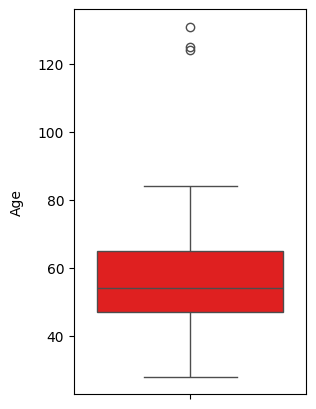

In [24]:
# Remove outliers for Age
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Age,color='red')
plt.ylabel('Age',fontsize=10,labelpad=10)

Text(0, 0.5, 'Income')

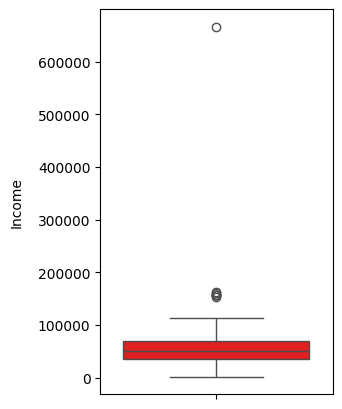

In [25]:
# Remove outliers for Income
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Income,color='red')
plt.ylabel('Income',fontsize=10,labelpad=10)

In [26]:
# Remove outliers of Age and Income
customer = customer[customer.Age<=85]
customer = customer[customer.Income<=120000]

Text(0, 0.5, 'Age')

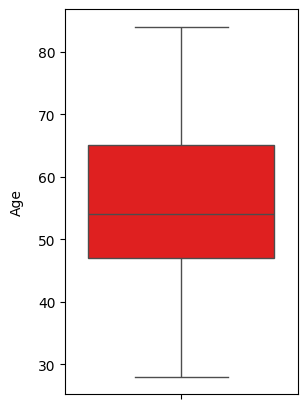

In [27]:
# Visualizing after removing outliers
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Age,color='red')
plt.ylabel('Age',fontsize=10,labelpad=10)

In [28]:
customer.shape

(2205, 34)

# **Exploratory Data Analysis**

In [29]:
# Marital Status
m_status = customer['Marital_Status'].value_counts()
fig = px.pie(m_status, values = m_status.values, names = m_status.index) #color_discrete_sequence=px.colors.sequential.RdBu
fig.update_traces(textposition='inside',textinfo='percent+label',marker = dict(line=dict(color='white',width=4)))
fig.show()

<ipython-input-30-c108c1446d57>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




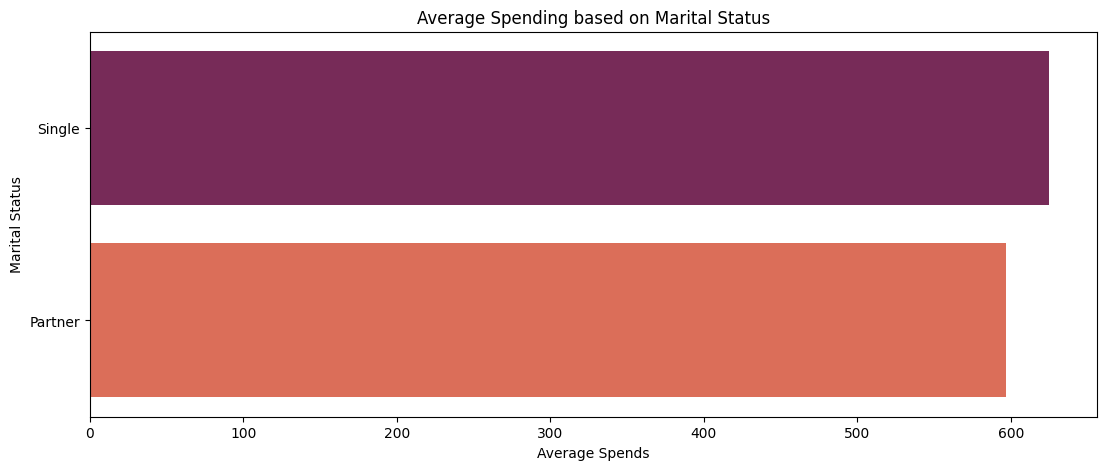

In [30]:
# Average Spending based on Marital Status
m_spending = customer.groupby('Marital_Status')['Total_Spending'].mean().sort_values(ascending=False)
m_spending_df = pd.DataFrame(list(m_spending.items()),columns=['Marital_Status','Average_Spending'])
plt.figure(figsize=(13,5))
sns.barplot(data=m_spending_df,x='Average_Spending',y='Marital_Status',palette='rocket')
plt.title('Average Spending based on Marital Status')
plt.xlabel('Average Spends')
plt.ylabel('Marital Status')
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Total_Spending'>

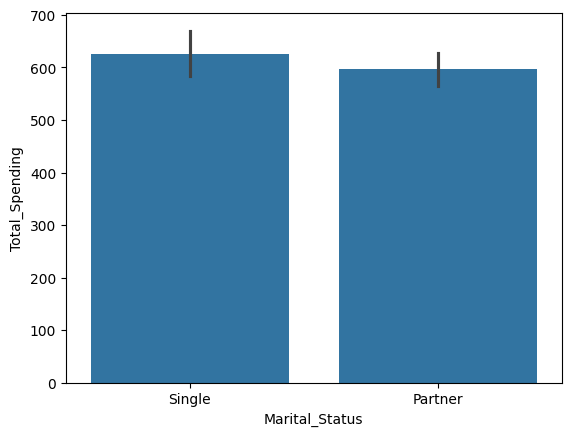

In [31]:
sns.barplot(x='Marital_Status',y='Total_Spending',data=customer)

In [32]:
# Education Level
education = customer.Education.value_counts()
education

Education
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [33]:
fig = px.pie(education, values = education.values, names = education.index) #color_discrete_sequence=px.colors.sequential.RdBu
fig.update_traces(textposition='inside',textinfo='percent+label',marker = dict(line=dict(color='white',width=2)))
fig.show()

In [34]:
# Child Status
children = customer.children.value_counts()
children

children
1    1112
0     628
2     415
3      50
Name: count, dtype: int64

In [35]:
fig = px.pie(children, values = children.values, names = children.index) #color_discrete_sequence=px.colors.sequential.RdBu
fig.update_traces(textposition='inside',textinfo='percent+label',marker = dict(line=dict(color='white',width=2)))
fig.show()

<ipython-input-36-0bf42a2ab2a5>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




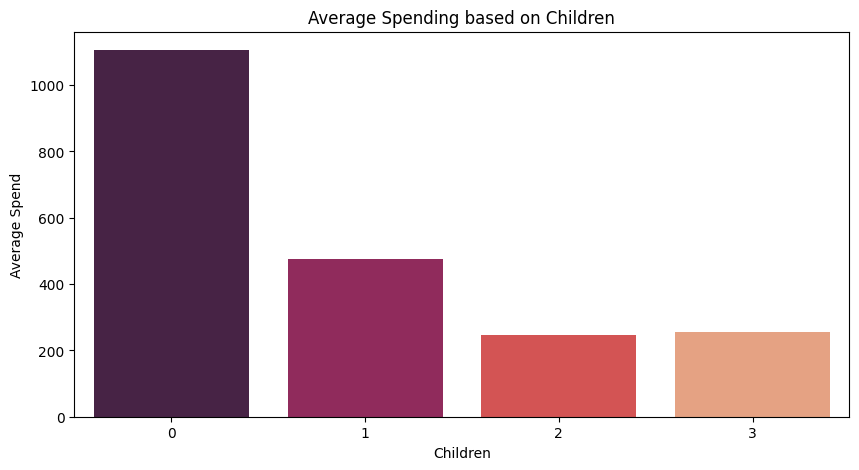

In [36]:
# Average Spending based on Children
child_spending = customer.groupby('children')['Total_Spending'].mean().sort_values(ascending=False)
child_spending_df = pd.DataFrame(list(child_spending.items()),columns=['No.of Children','Average_Spending'])
plt.figure(figsize=(10,5))
sns.barplot(data=child_spending_df,x='No.of Children',y='Average_Spending',palette='rocket')
plt.title('Average Spending based on Children')
plt.xlabel('Children')
plt.ylabel('Average Spend')
plt.show()

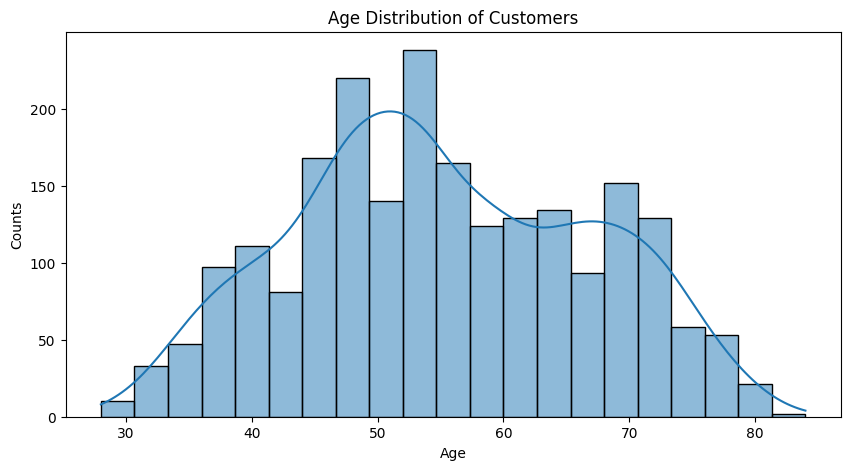

In [37]:
# Age Distribution
plt.figure(figsize=(10,5))
ax=sns.histplot(data=customer.Age,kde=True)
ax.set(title='Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

Most of the Customers are Middle-Aged between Age of 44 and 52

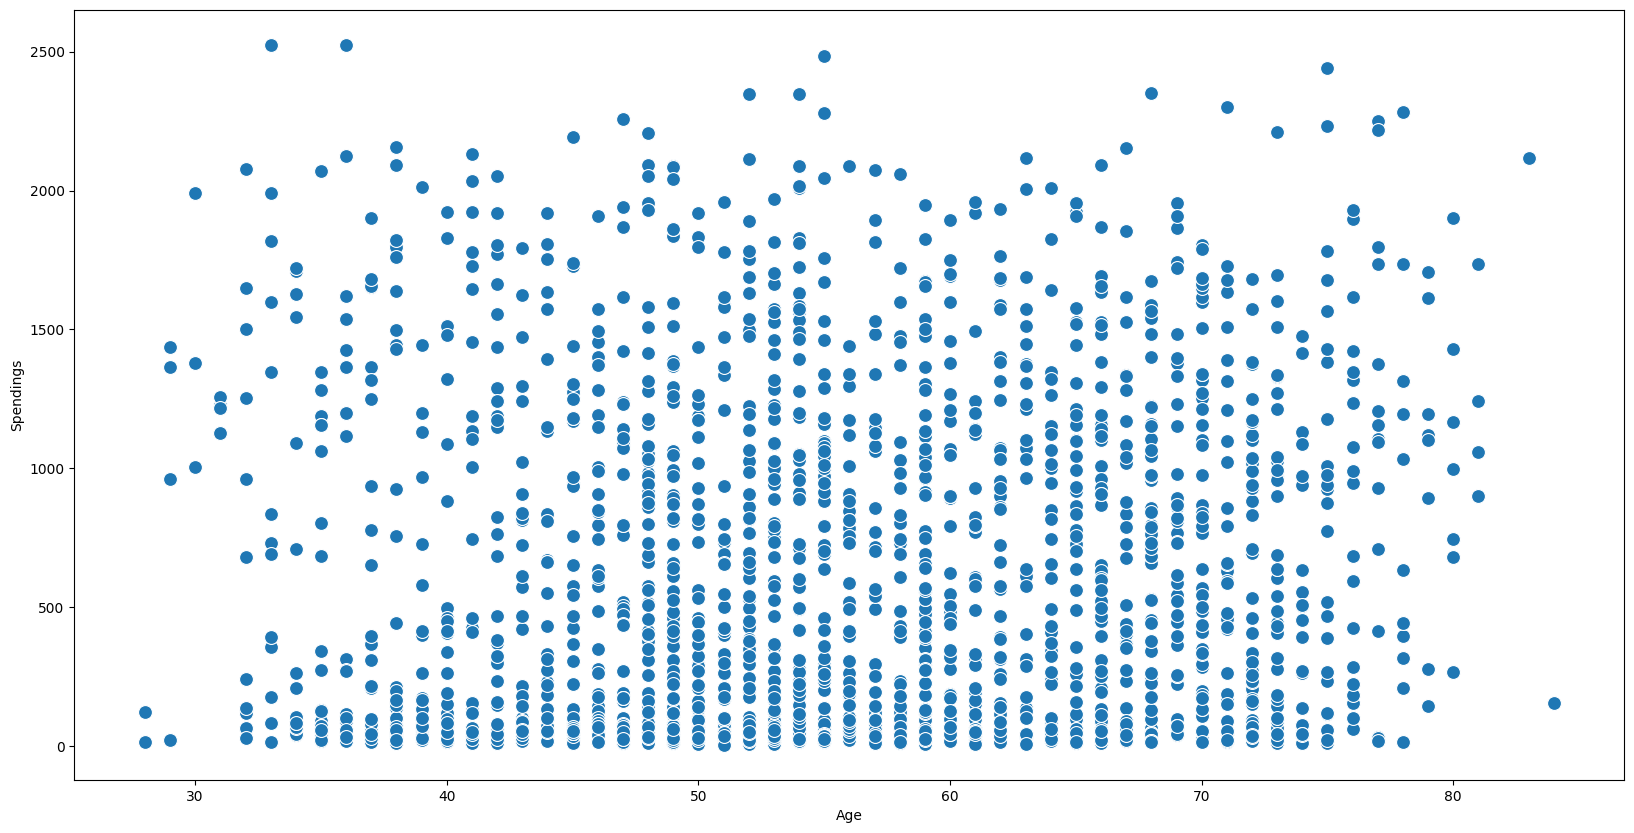

In [38]:
# Relationship: Age vs Spending
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Age,y=customer.Total_Spending,s=100)
plt.xlabel('Age')
plt.ylabel('Spendings')
plt.show()

# **Customer Segmentation**

In [39]:
agegroup = customer.AgeGroup.value_counts()
agegroup

AgeGroup
MiddleAged       1215
SeniorCitizen     771
Adult             219
Name: count, dtype: int64

In [40]:
fig = px.pie(labels=agegroup.index,values=agegroup.values,names=agegroup.index,width=500,height=500)
fig.update_traces(textposition='inside',textinfo='percent+label',hole=0.3)
#fig.update_layout(annotations=[dict(text='AgeGroup',x=0.5,y=0.5,font_size=20,showarrow=False,font_color='black')],showlegend=False)
fig.show()

<ipython-input-41-b104bd5672da>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




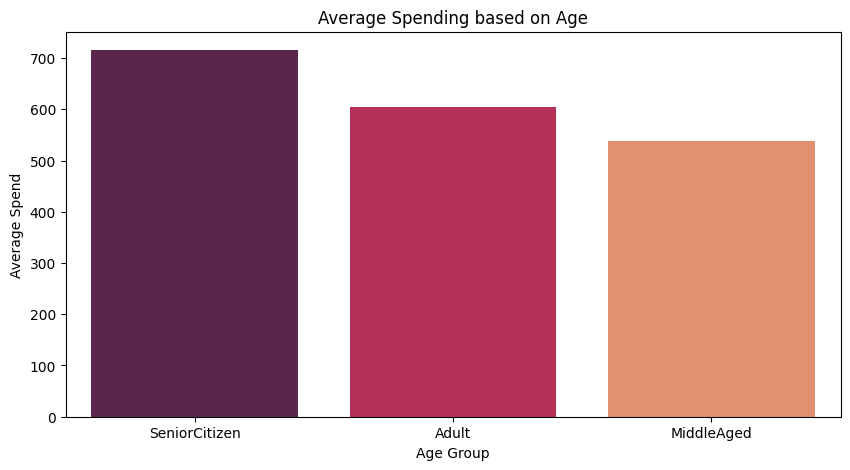

In [41]:
# Average Spending :Age wise
agewise_spending = customer.groupby('AgeGroup')['Total_Spending'].mean().sort_values(ascending=False)
agewise_spending_df = pd.DataFrame(list(agewise_spending.items()),columns=['Age Group','Average_Spending'])
plt.figure(figsize=(10,5))
sns.barplot(data=agewise_spending_df,x='Age Group',y='Average_Spending',palette='rocket')
plt.title('Average Spending based on Age')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.show()

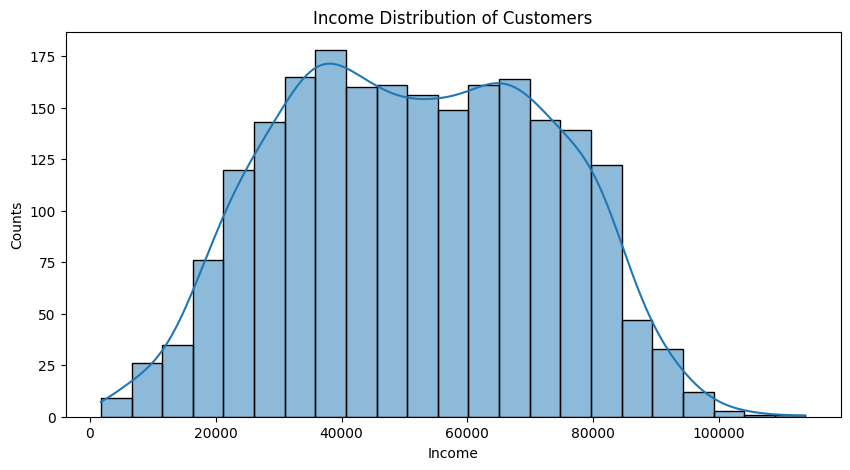

In [42]:
# Income Distribution of Customers
plt.figure(figsize=(10,5))
ax=sns.histplot(data=customer.Income,kde=True)
ax.set(title='Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

Income of customers has been distributed between 20000 and 8000

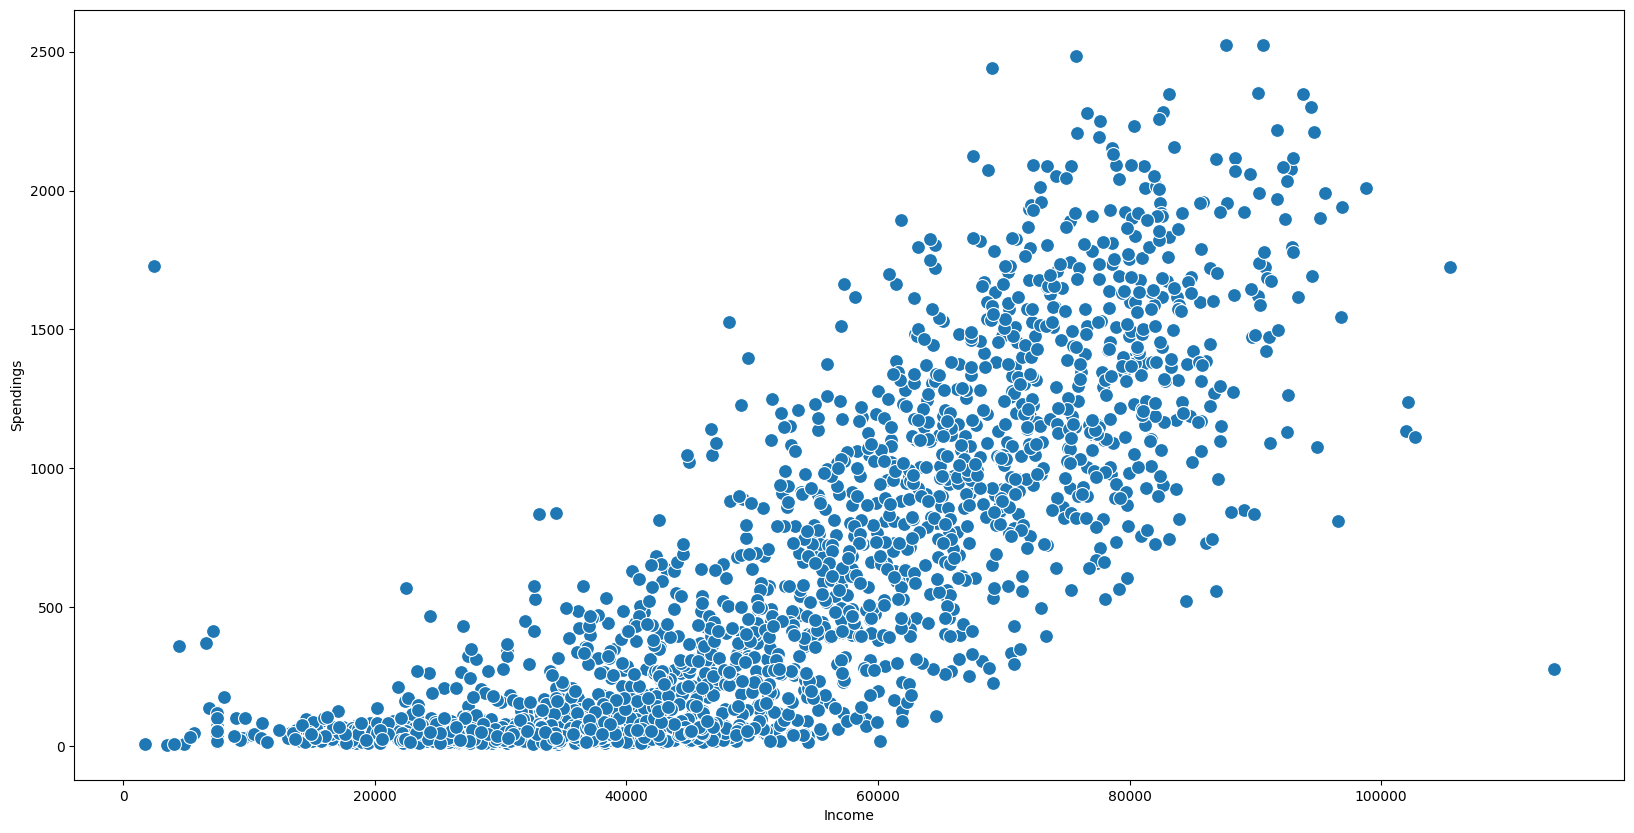

In [43]:
# Relationship: Income vs Spending
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Income,y=customer.Total_Spending,s=100)
plt.xlabel('Income')
plt.ylabel('Spendings')
plt.show()

Customer Spending gets increased based on their Income

In [44]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Month_Customer', 'Total_Spending', 'AgeGroup', 'children'],
      dtype='object')

In [45]:
# Most Bought Product
products = customer[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
products_means = products.mean(axis=0).sort_values(ascending=False)
products_means_df=pd.DataFrame(list(products_means.items()),columns=['Product','Average Spending'])

In [46]:
products_means_df

,Product,Average Spending
0,MntWines,306.164626
1,MntMeatProducts,165.312018
2,MntGoldProds,44.057143
3,MntFishProducts,37.756463
4,MntSweetProducts,27.128345
5,MntFruits,26.403175


<ipython-input-47-47c55ac4cc86>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




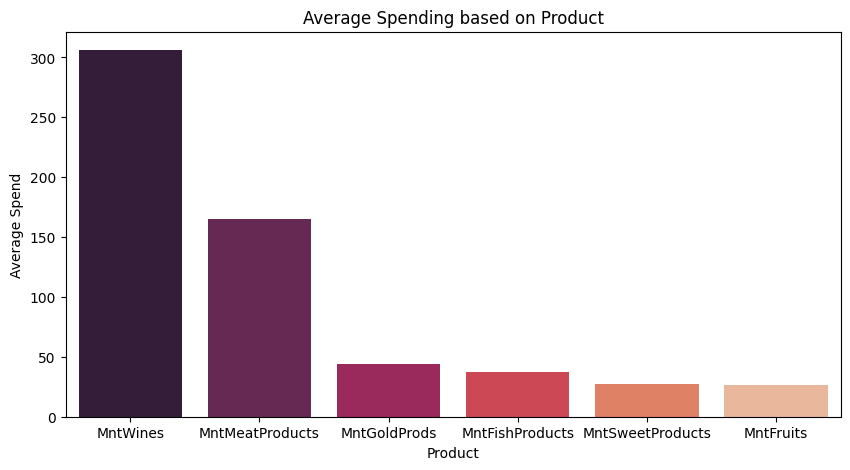

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(data=products_means_df,x='Product',y='Average Spending',palette='rocket')
plt.title('Average Spending based on Product')
plt.xlabel('Product')
plt.ylabel('Average Spend')
plt.show()

## **Machine Learning Model**

In [48]:
x = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status','Kidhome',
                   'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                   'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','AgeGroup'],axis=1)

In [49]:
x.columns

Index(['Income', 'Age', 'Month_Customer', 'Total_Spending', 'children'], dtype='object')

In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2205 non-null   float64
 1   Age             2205 non-null   int64  
 2   Month_Customer  2205 non-null   float64
 3   Total_Spending  2205 non-null   int64  
 4   children        2205 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 103.4 KB


**Optimum Cluster Using Elbow method**

In [51]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

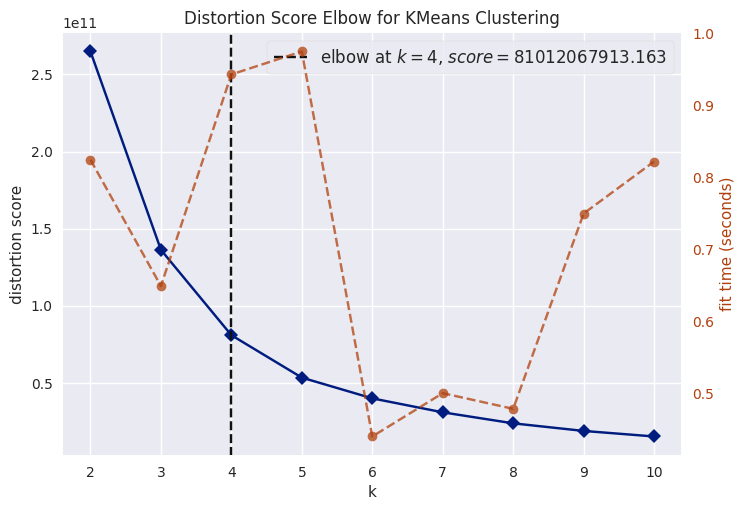

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.colors as colors

# Setting up colors preferences for dark mode
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("dark"))

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(x)
Elbow_M.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

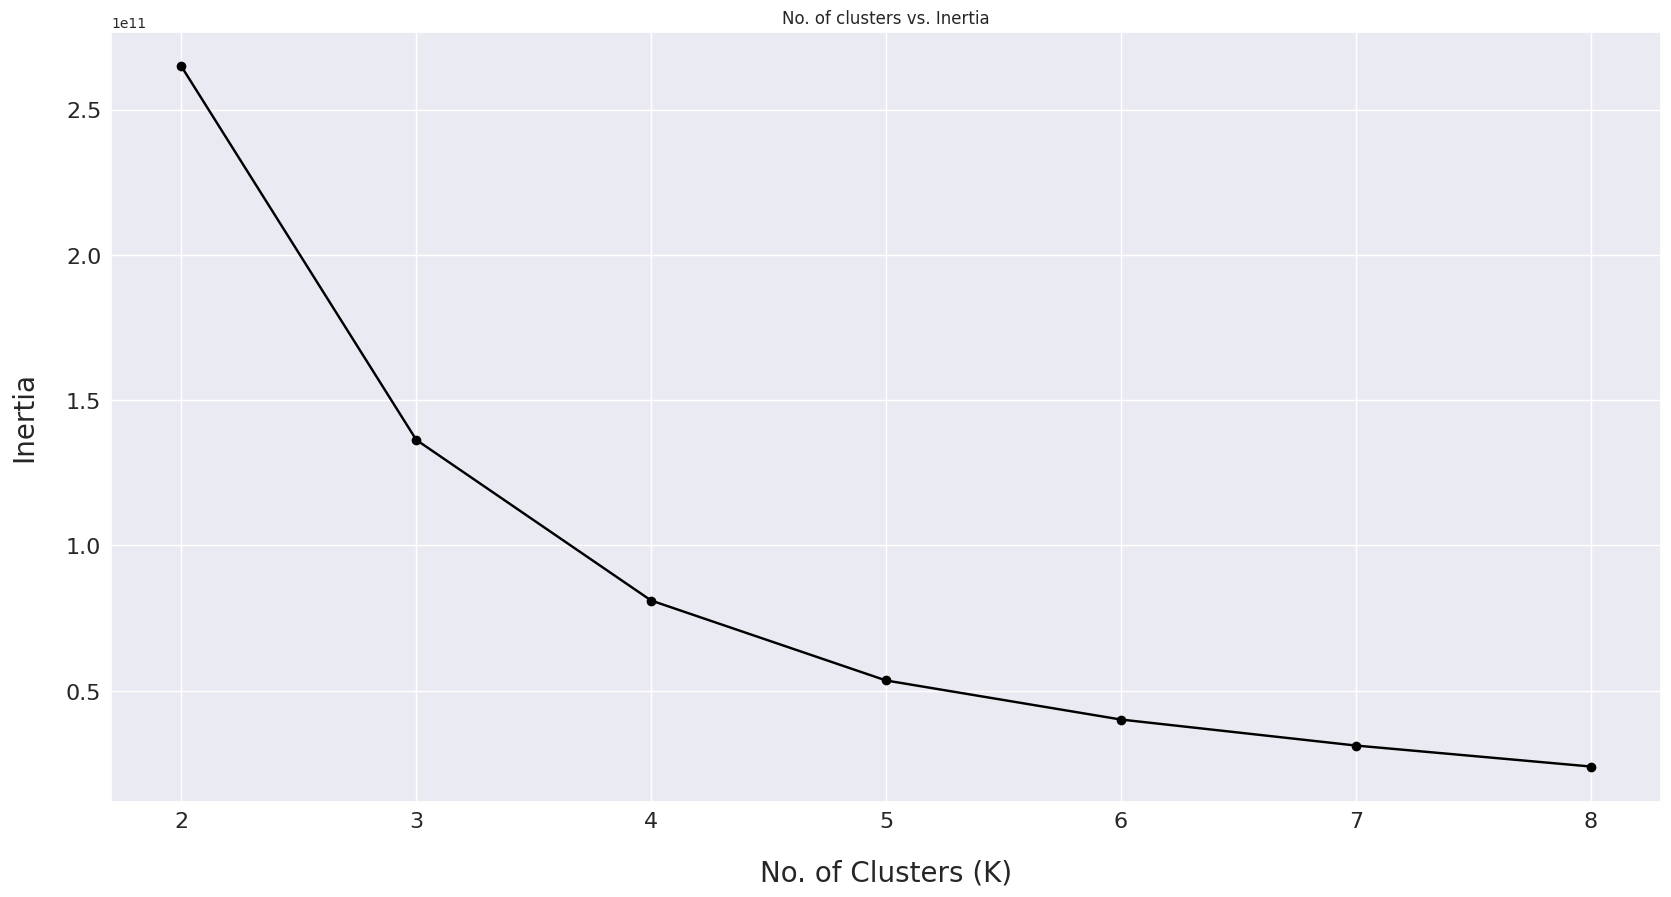

In [53]:
options = range(2, 9)
inertias = []

for n_clusters in options:
    # Explicitly set n_init to suppress the warning
    model = KMeans(n_clusters, random_state=42).fit(x)
    inertias.append(model.inertia_)

plt.figure(figsize=(20, 10))
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o', color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20)

plt.show()

In [54]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(x)

preds = model.predict(x)

customer_kmeans = x.copy()
customer_kmeans['clusters'] = preds

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [55]:
customer_kmeans

,Income,Age,Month_Customer,Total_Spending,children,clusters
0,58138.0,67,136.0,1617,0,2
1,46344.0,70,118.0,27,2,3
2,71613.0,59,125.0,776,0,1
3,26646.0,40,119.0,53,1,0
4,58293.0,43,120.0,422,1,2
...,...,...,...,...,...,...
2235,61223.0,57,127.0,1341,1,2
2236,64014.0,78,115.0,444,3,2
2237,56981.0,43,120.0,1241,0,2
2238,69245.0,68,120.0,843,1,2


In [56]:
customer_kmeans['clusters'].value_counts()

clusters
3    642
2    611
1    508
0    444
Name: count, dtype: int64

# **Cluster Distributions**

<ipython-input-57-2e058ea253bb>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Income')

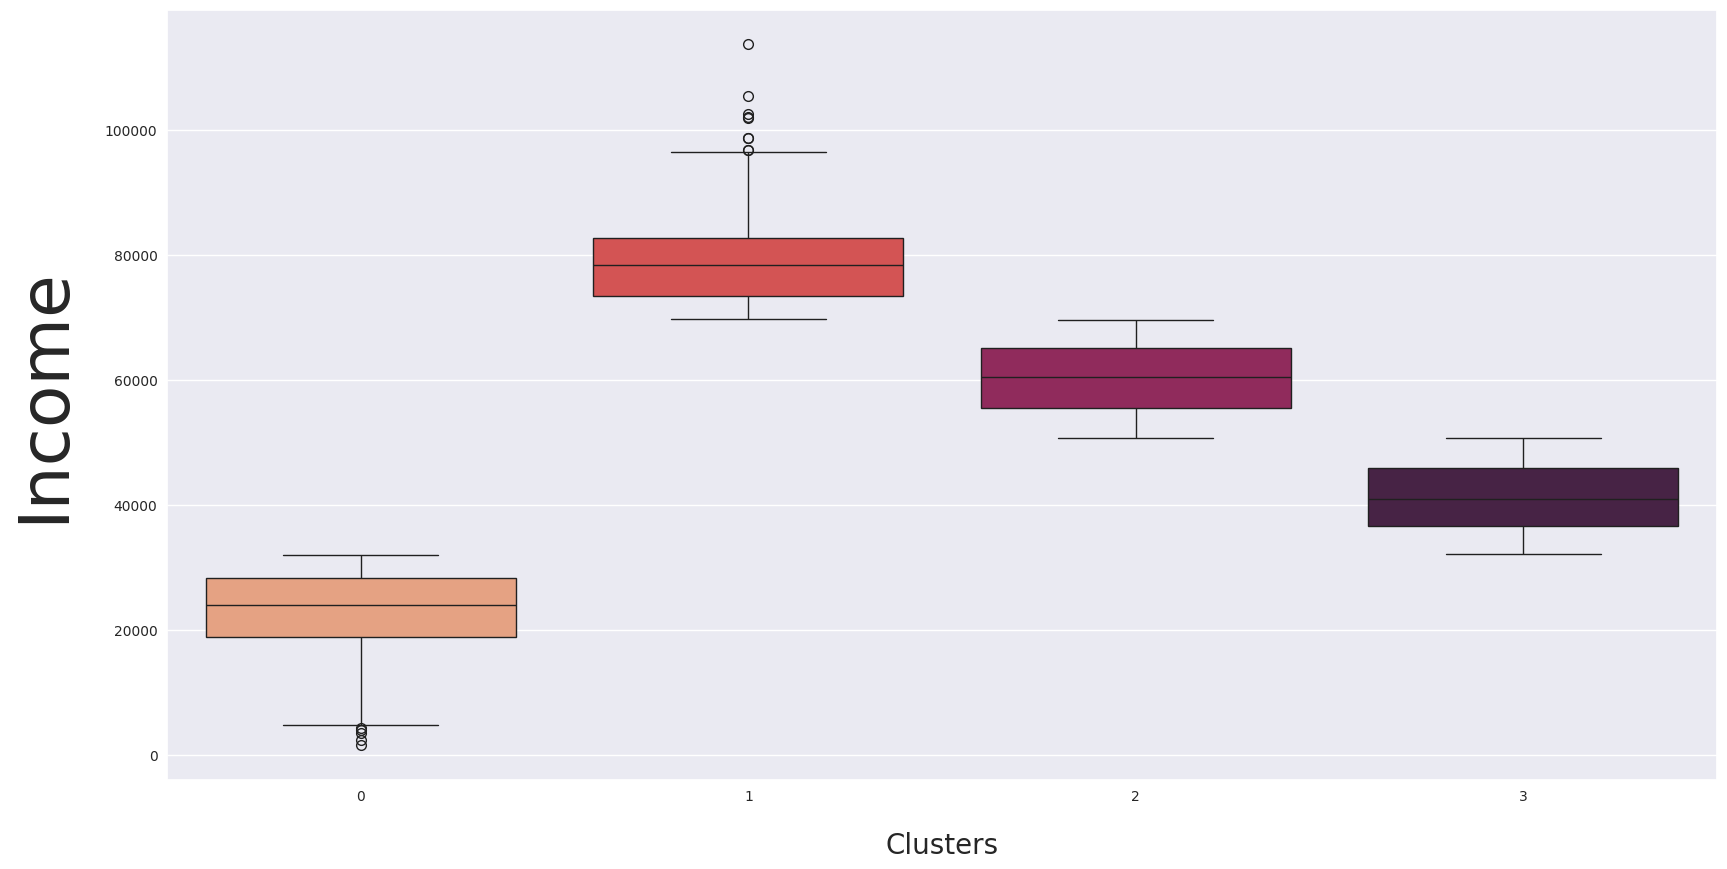

In [57]:
#Income
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income',palette='rocket_r')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=50, labelpad=20)

**Insights**

Cluster 0: Shows Income with majority of values with greater than 20000 to 3000

Cluster 1: Shows Income with majority of values around 80000 and some points around 100000

Cluster 2: Shows Income with majority of values almost around 60000

Cluster 3: Shows Income with majority of values almost around 40000

Cluster 0 and 3 are considered as Low Income groups

<ipython-input-58-75240c28eaac>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Age')

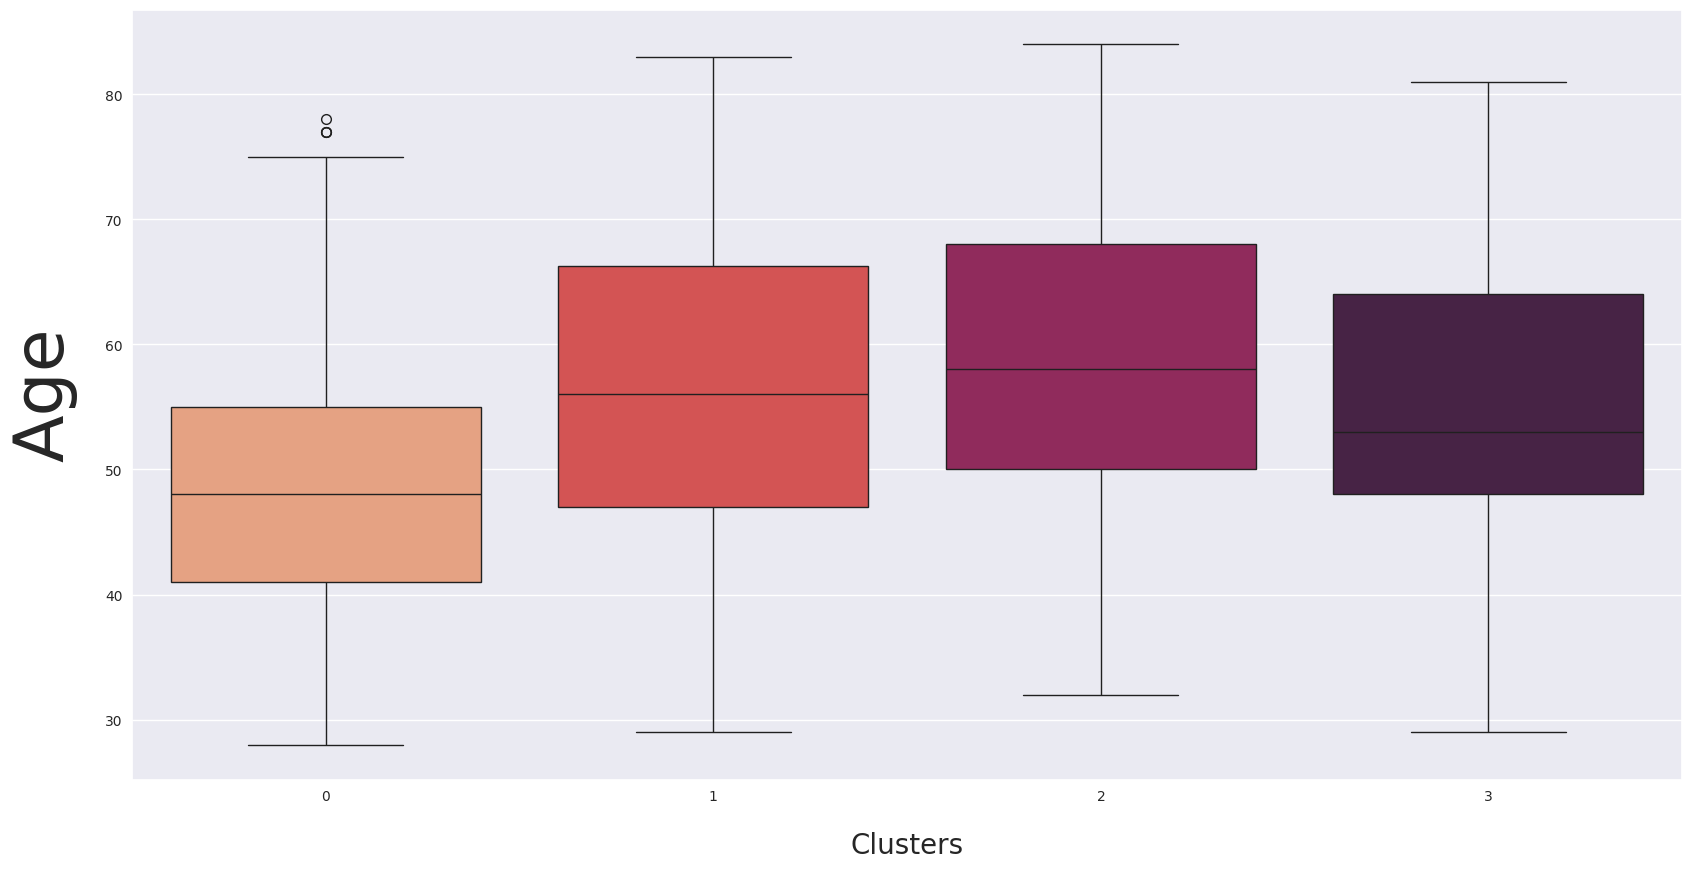

In [58]:
#Age
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age',palette='rocket_r')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=50, labelpad=20)

**Insights**

Cluster 0: Majority of people belongs to age greater than 40 to 55

Cluster 1: Majority of people belongs to age from 45 to 65

Cluster 2: Majority of people belongs to age of 50 to 70

Cluster 3: Majority of people belongs to age between 50 to 60

<ipython-input-59-6efc6da21f1b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Monthcustomer')

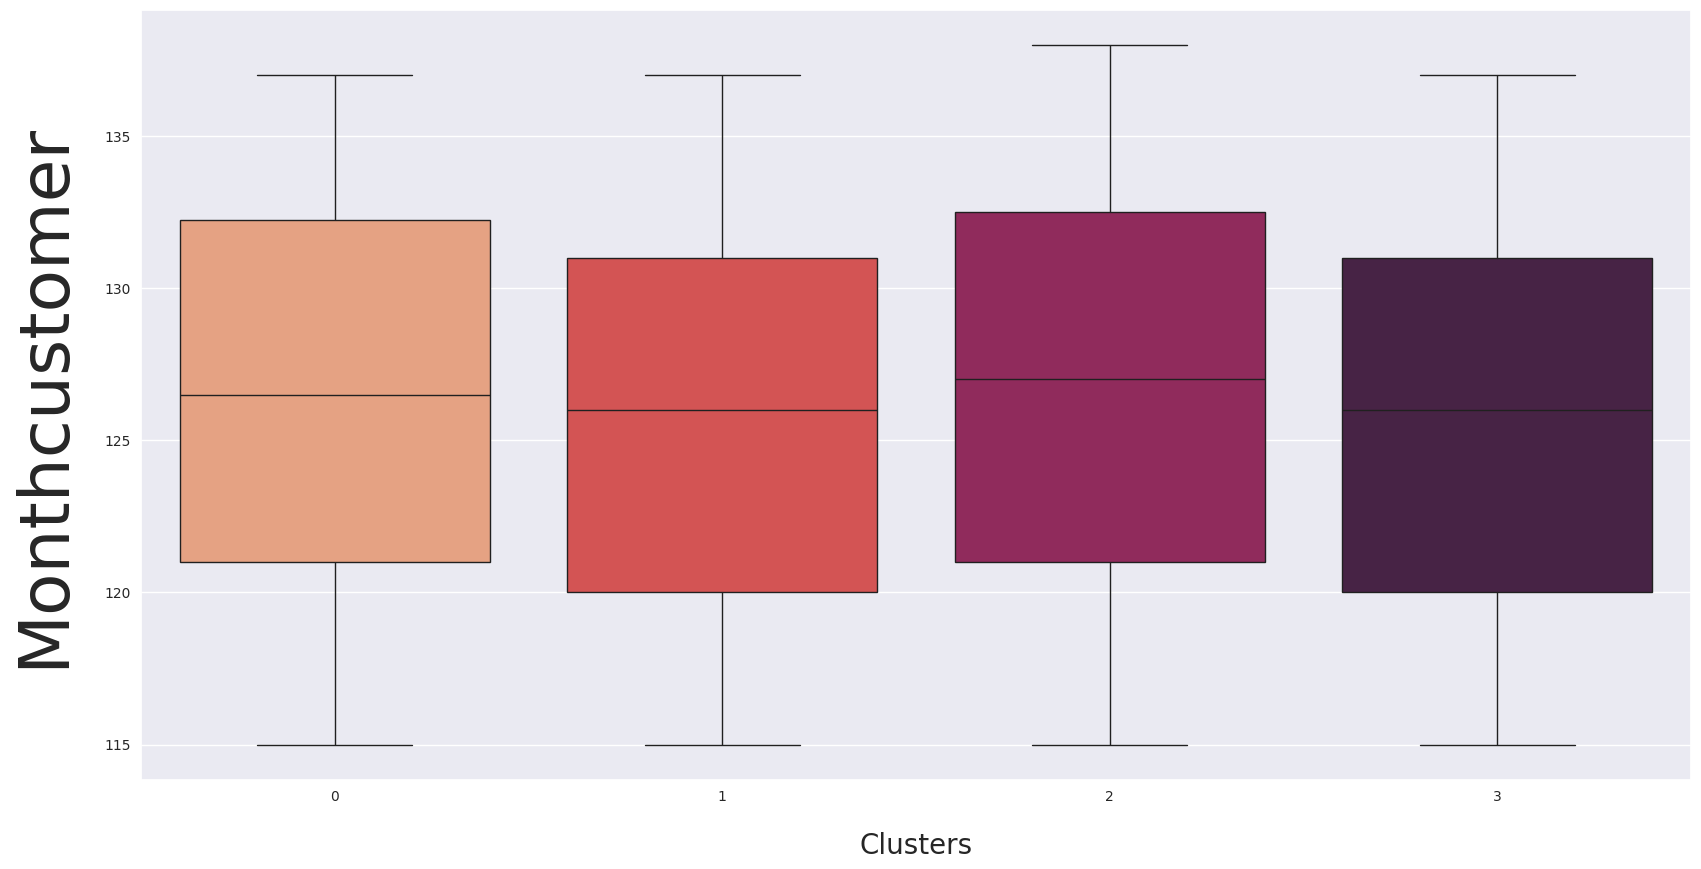

In [59]:
#Month_Customer
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer',palette='rocket_r')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Monthcustomer', fontsize=50, labelpad=20)

**Insights**

Almost All the customers retains more than 120 months to 130 months

<ipython-input-60-76de3179ab1d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Total_Spending')

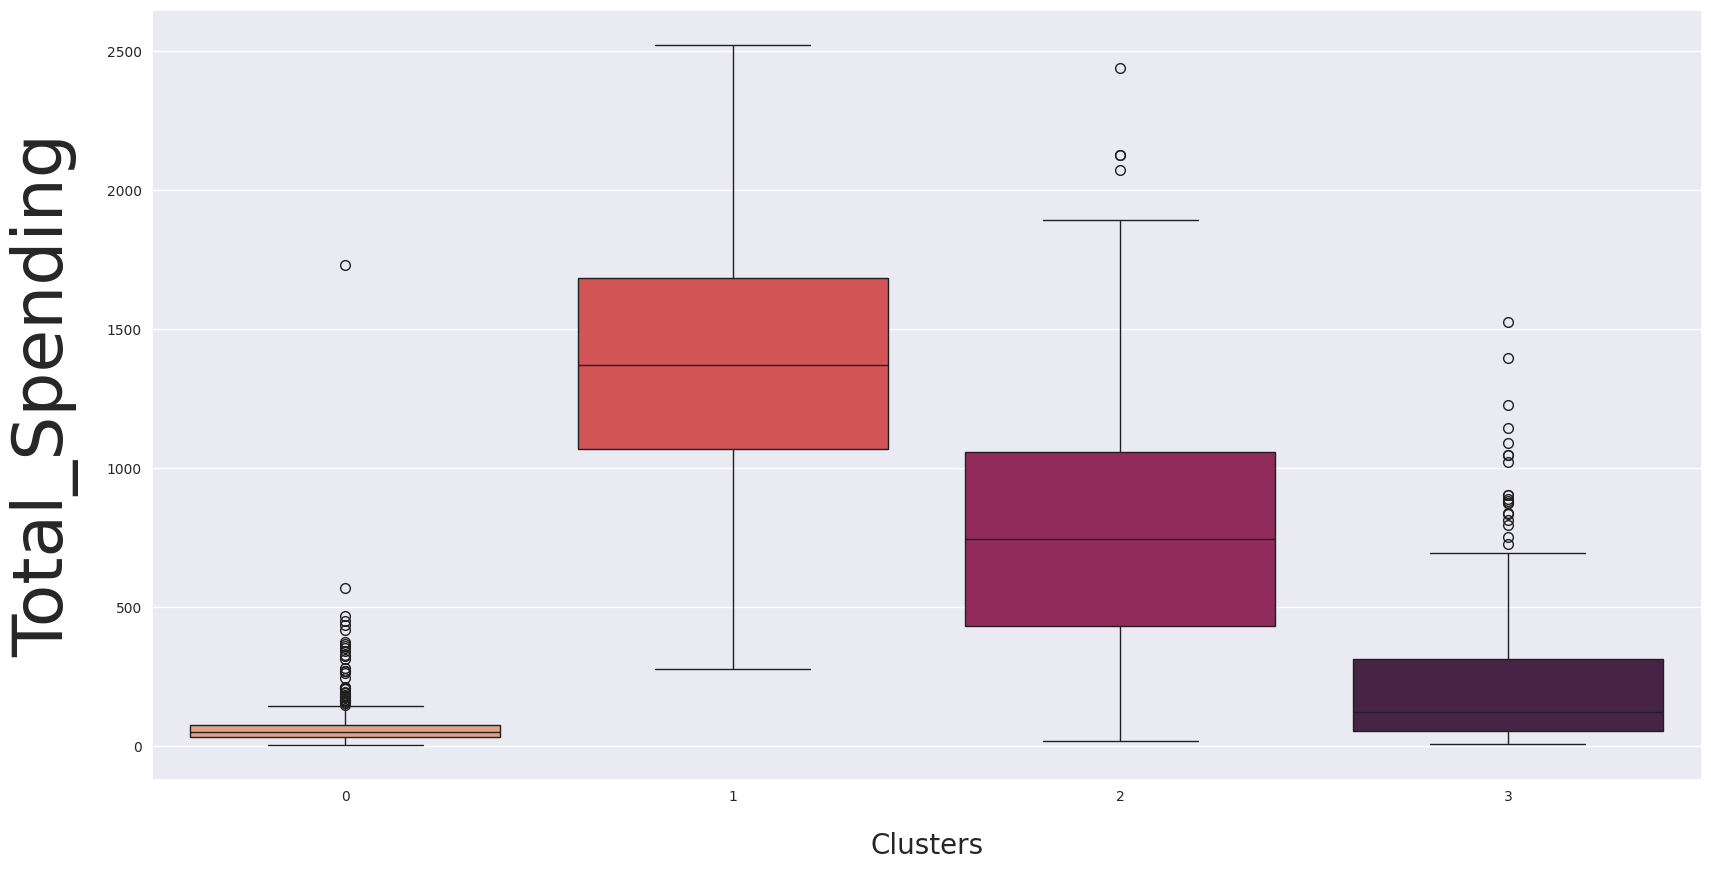

In [60]:
#Total_Spending
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Total_Spending',palette='rocket_r')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Total_Spending', fontsize=50, labelpad=20)

**Insights**

Cluster 0 : Shows very less spendings

Cluster 1: Shows spending greater than 1000 to 1500

Cluster 2: Shows spending from 500 to 1000

Cluster 3: Shows spending about 200 to 250

<ipython-input-61-c71d26c61946>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'children')

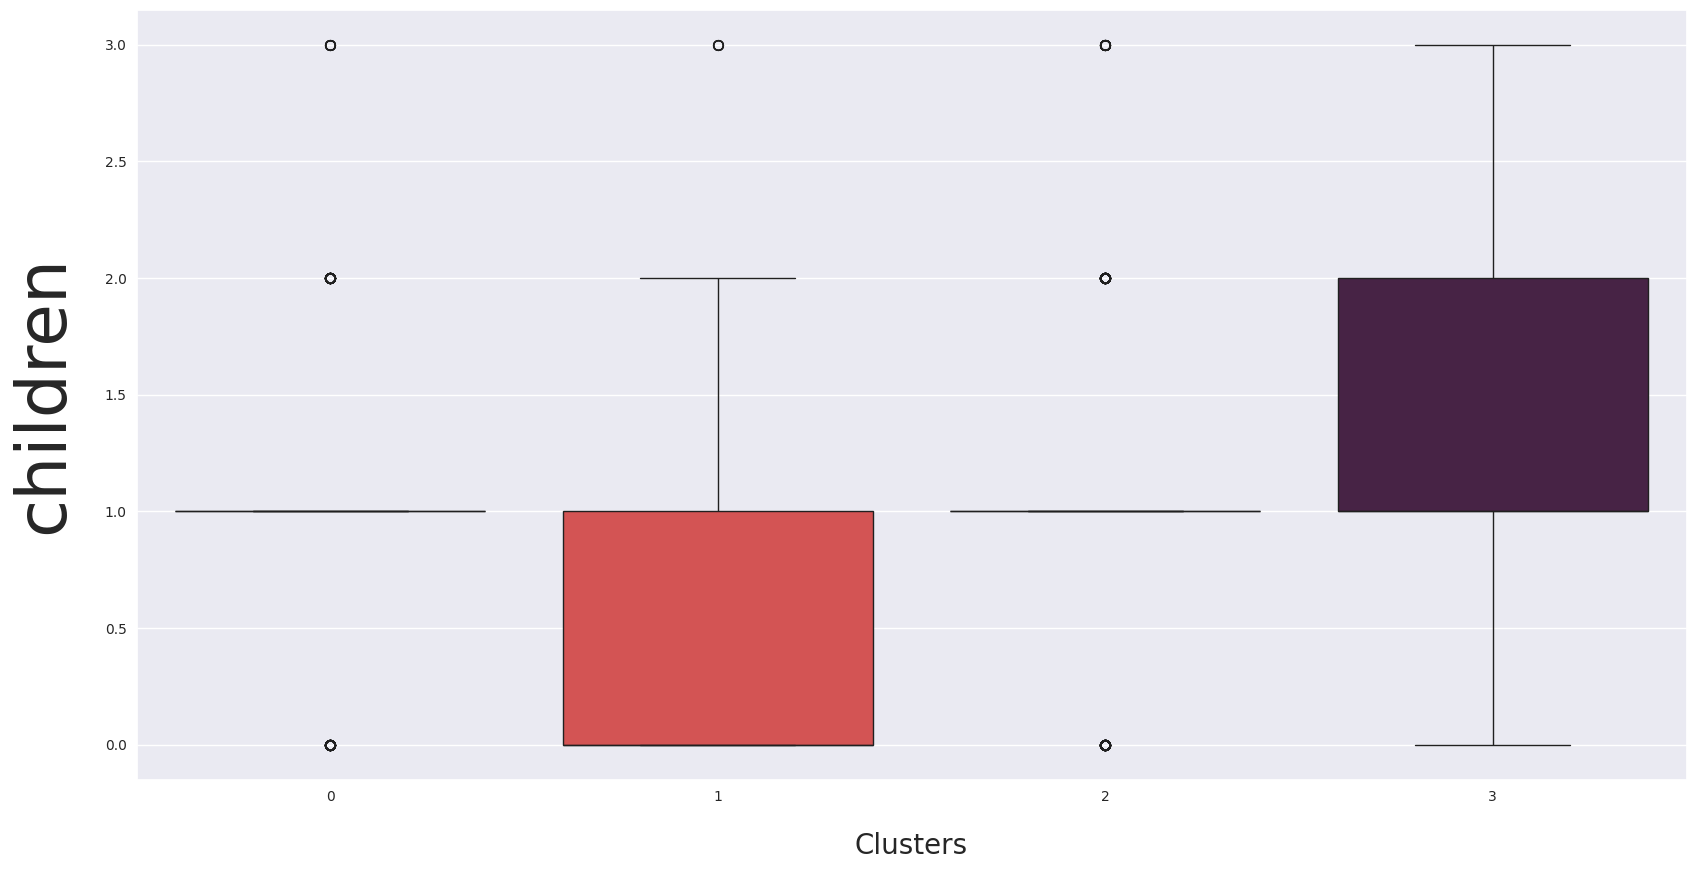

In [61]:
#children
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'children',palette='rocket_r')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('children', fontsize=50, labelpad=20)

**Insights**

Cluster 1 and 3: Shows very less customers have 1 children

Cluster 2: Shows customers with 0 to 1 children

Cluster 3: Shows customers with 1 or 2 children

# **Data Exploration of Clusters**

**Cluster 0:**

Income--> Very Low compared to other Clusters

Age--> greater than 40 to 55

Spendings--> Not more than 100

Children--> Not more than 1

**Cluster 1:**

Income--> Greater than 80000 and some points around 100000

Age--> greater than 45 to 65

Spendings--> greater than 1000 to 1500

Children--> Mostly either 0 or 1

**Cluster 2:**

Income--> almost around 60000

Age--> greater than 50 to 70

Spendings--> from 500 to 1000

Children--> Not more than 1

**Cluster 3:**

Income--> almost around 40000

Age--> age around 50 to 60

Spendings--> about 200 to 250

Children--> Either 1 or 2

In [62]:
# Renaming Cluster value with names
customer_kmeans.clusters = customer_kmeans.clusters.replace({0 : 'Bronze',
                                                             1 : 'Silver',
                                                             2 : 'Gold',
                                                             3: 'Platinum'})
customer_kmeans['clusters'] = customer_kmeans.clusters

In [64]:
customer_kmeans.head(10)

,Income,Age,Month_Customer,Total_Spending,children,clusters
0,58138.0,67,136.0,1617,0,Gold
1,46344.0,70,118.0,27,2,Platinum
2,71613.0,59,125.0,776,0,Silver
3,26646.0,40,119.0,53,1,Bronze
4,58293.0,43,120.0,422,1,Gold
5,62513.0,57,124.0,716,1,Gold
6,55635.0,53,134.0,590,1,Gold
7,33454.0,39,128.0,169,1,Platinum
8,30351.0,50,127.0,46,1,Bronze
9,5648.0,74,118.0,49,2,Bronze


In [63]:
customer_kmeans['clusters'].value_counts()

clusters
Platinum    642
Gold        611
Silver      508
Bronze      444
Name: count, dtype: int64

In [68]:
customer['clusters'] = customer_kmeans.clusters

**Relationship between Income and Spendings**

Text(0, 0.5, 'Total Spendings')

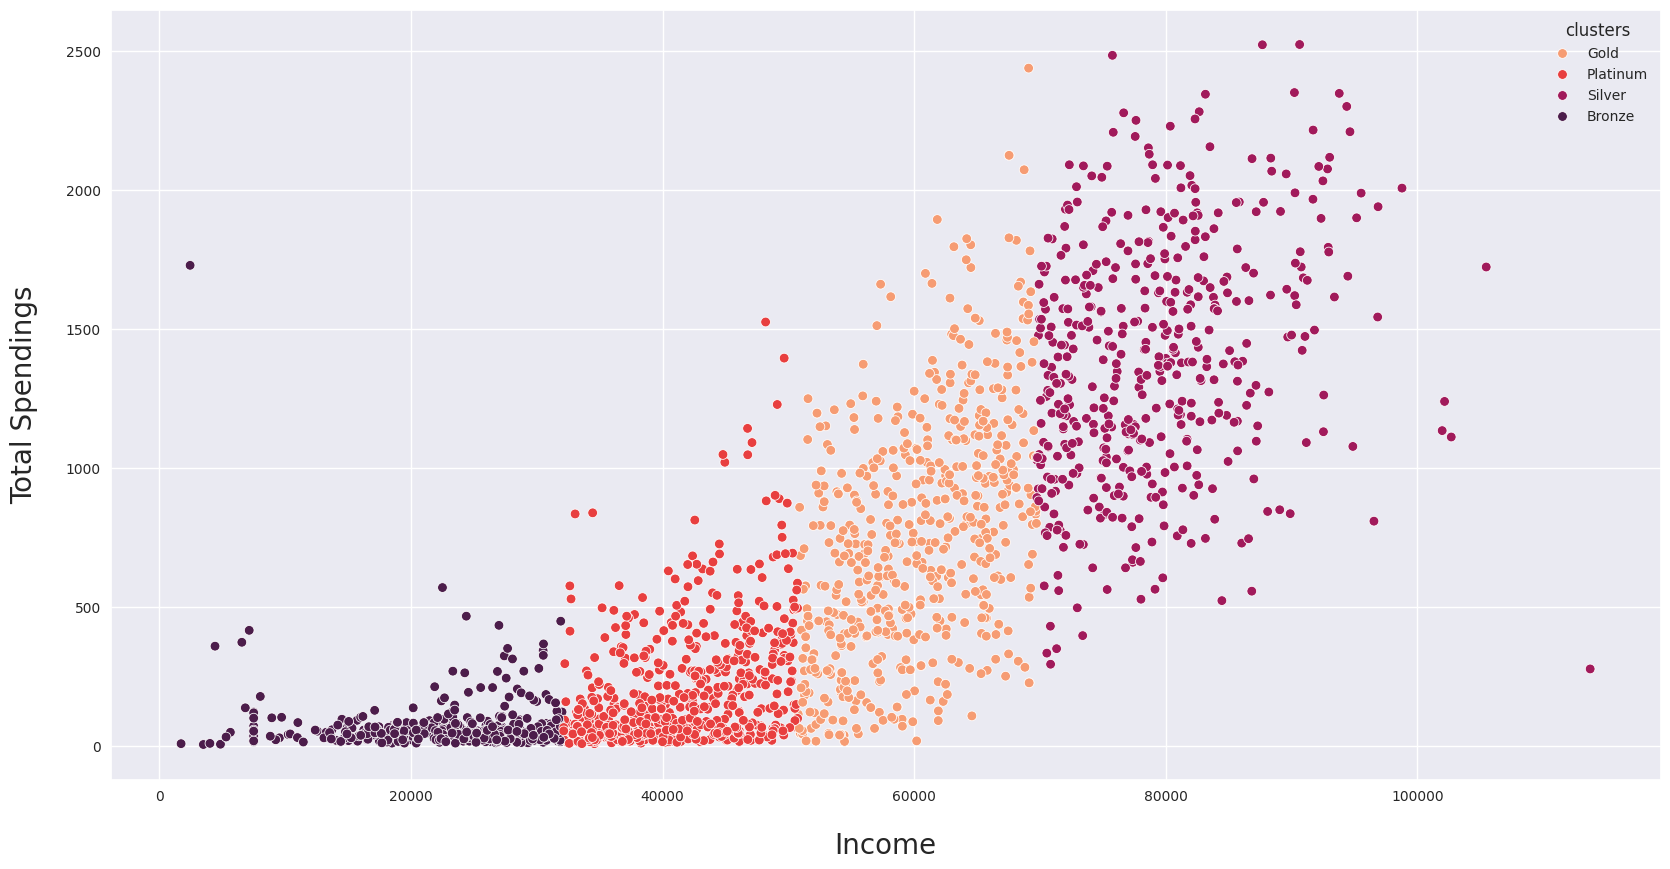

In [69]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer, x='Income', y='Total_Spending', hue='clusters', palette='rocket_r')
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20)

**Spending Habits based on Products**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bronze'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Silver')])

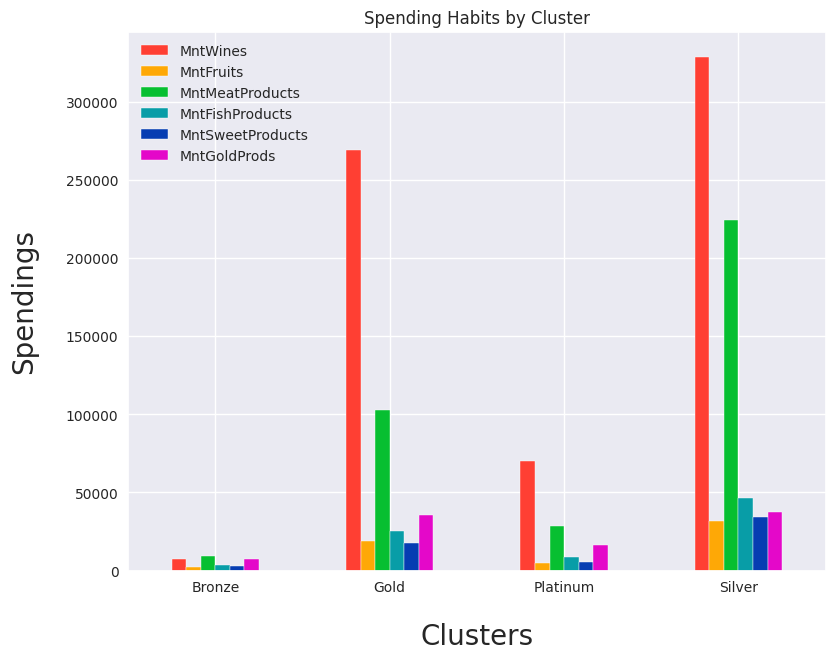

In [73]:
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts',
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', figsize=(9,7), color=['#ff3f33','#fea806','#07bf31','#089da7','#063db2','#e408c9'])

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

**Insights**

Customers from Gold and Silver category has purchased more when compared to others

Almost all the customers have purchaced Wine,Meat and Gold Products

Customers from Silver category have purchaced all products.

**Customers Purchace based on Categories**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bronze'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Silver')])

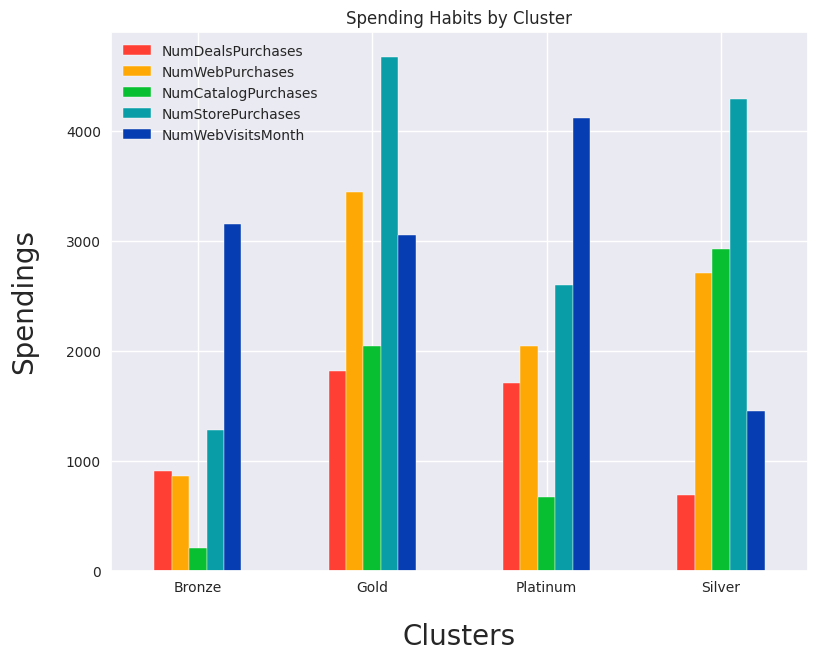

In [74]:
cluster_spendings = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_spendings.plot(kind='bar', figsize=(9,7), color=['#ff3f33','#fea806','#07bf31','#089da7','#063db2','#e408c9'])

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

**Insights**

Almost all the customers bought products through Website

Customers from Gold and Silver category have purchased more from stores

Every customers visits website regularly

**Customers Acceptance of Campaign**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bronze'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Silver')])

<Figure size 3000x1500 with 0 Axes>

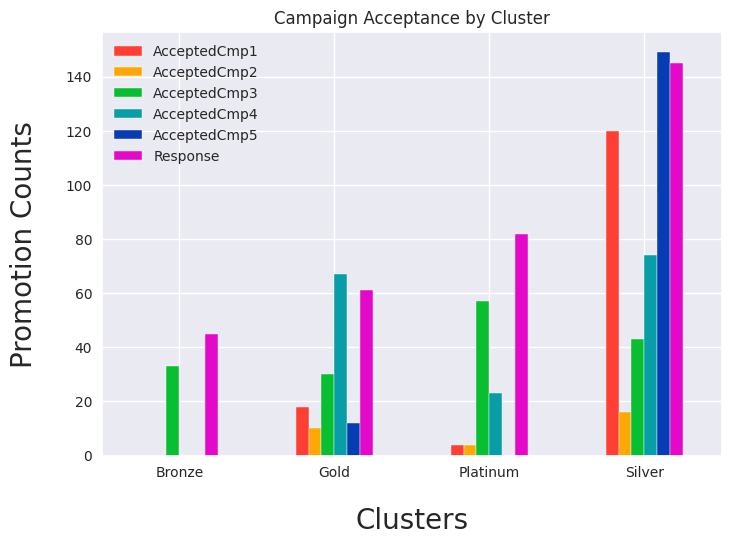

In [75]:
cluster_campaign = customer.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['#ff3f33','#fea806','#07bf31','#089da7','#063db2','#e408c9'])

plt.title('Campaign Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center')

**Insights**

Customers from Silver category has accepted all Campaigns

Customer from Bronze category have accepted less Campaign

Almost all the customers have Responsed for Campaign